In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_excel('GMLA.xlsx', sheet_name='GMLAL Status Summary- 2022 New')

In [141]:
# Remove projects without GMLA
df = df[df['GMLA Result Complete\n(PQE Maintain)'].isin(['N','Y'])]

In [142]:
df = df.iloc[:,:10]

In [143]:
df.rename(columns={df.columns[6]: "Close meeting Target date", 
                   df.columns[7]: "Close meeting Actual date",
                   df.columns[8]: "GMLA start date",
                   df.columns[1]: "Project Name"}, inplace=True)

In [144]:
df.drop((df.columns[3:5]), axis=1, inplace=True)

In [145]:
#Replace MAR

df['DPQE'].replace('Cooper Wang/ Wendy Ni','Cooper Wang', inplace=True)

In [146]:
replace_nan_list = ['No MPM','TBD','No WP request','project cancelled','no need','Net yet']
df.replace(replace_nan_list,np.NaN, inplace=True)

In [147]:
df['Close meeting Actual date'] = pd.to_datetime(df['Close meeting Actual date'])

In [149]:
df['combined_date'] = df['Close meeting Actual date'].fillna(df['Close meeting Target date'])

In [150]:
df

,Category,Project Name,Phase Name,GMLA Phase,Close meeting Target date,Close meeting Actual date,GMLA start date,DPQE,combined_date
0,Marine,Fusion - Apollo Amplifiers 6 / 8 channel (Tune...,Detailed Design,GMLA1,2020-10-19,2019-07-31,2019-07-31 00:00:00,Jason Hsu,2019-07-31
1,Aviation,Aera 760,Detailed Design,GMLA1,NaT,2019-08-13,2019-08-13 00:00:00,Abner Tsai,2019-08-13
4,Outdoor,GPSMAP 66sr,Factory Prototye,GMLA2,2019-12-27,2019-12-13,2019-12-13 00:00:00,Chris Kuo,2019-12-13
5,Outdoor,Alpha 200i,Factory Prototye,GMLA2,2019-12-20,NaT,2019-12-20 00:00:00,Chris Kuo,2019-12-20
7,Outdoor,fenix 6 Solar (2020),Factory Prototye,GMLA2,2019-12-20,2019-12-26,2019-12-26 00:00:00,Abner Tsai,2019-12-26
...,...,...,...,...,...,...,...,...,...
504,Fitness,Tacx NEO 3M,Factory Prototye,GMLA2,2023-02-08,NaT,2023-02-08 00:00:00,Chris Kuo,2023-02-08
505,Fitness,Tacx NEO 3M,Pilot Run,GMLA3,2023-04-12,NaT,2023-04-12 00:00:00,Chris Kuo,2023-04-12
506,Automotive,"Tread 8"" OEM w/ CAN",Detailed Design,GMLA1,NaT,NaT,00:00:00,Wendy Ni,NaT
507,Automotive,"dezl OTR Series 2022- 7""",Pilot Run,GMLA3,2022-03-08,NaT,2022-04-07 00:00:00,Wendy Ni,2022-03-08


In [151]:
df = df[df['combined_date'].notnull()]

In [152]:
df = df[df['combined_date']>'2022-01-01']

In [153]:
df['yearmonth']=df['combined_date'].dt.strftime('%Y-%m')

In [170]:
df['weighted'] = df['GMLA Phase'].apply(lambda gmla : 1 if gmla=='GMLA1' else 2 if gmla=='GMLA2' else 3 if gmla=='GMLA3' else 0)

In [171]:
df

,Category,Project Name,Phase Name,GMLA Phase,Close meeting Target date,Close meeting Actual date,GMLA start date,DPQE,combined_date,yearmonth,weighted
277,Marine,"ECHOMAP UHD2 (Touch) 6""",Factory Prototye,GMLA2,2022-05-31,NaT,2022-05-31 00:00:00,Jason Hsu,2022-05-31,2022-05,2
281,Marine,"ECHOMAP UHD2 (Touch) 6""",Pilot Run,GMLA3,2022-08-08,NaT,2022-08-08 00:00:00,Jason Hsu,2022-08-08,2022-08,3
289,Outdoor,Xero C1/C1 PRO Chronograph,Detailed Design,GMLA1,2021-07-08,2022-01-05,2022-01-05 00:00:00,Chris Kuo,2022-01-05,2022-01,1
293,Automotive,"dezl OTR Series 2022- 6""",Factory Prototye,GMLA2,2022-01-14,2022-01-14,2022-01-14 00:00:00,Wendy Ni,2022-01-14,2022-01,2
297,Marine,GHC 50,Pilot Run,GMLA3,2022-01-05,NaT,2022-01-05 00:00:00,Jason Hsu,2022-01-05,2022-01,3
...,...,...,...,...,...,...,...,...,...,...,...
502,Fitness,Forerunner 965,Pilot Run,GMLA3,2023-02-09,NaT,2023-02-09 00:00:00,Ernest Fu,2023-02-09,2023-02,3
504,Fitness,Tacx NEO 3M,Factory Prototye,GMLA2,2023-02-08,NaT,2023-02-08 00:00:00,Chris Kuo,2023-02-08,2023-02,2
505,Fitness,Tacx NEO 3M,Pilot Run,GMLA3,2023-04-12,NaT,2023-04-12 00:00:00,Chris Kuo,2023-04-12,2023-04,3
507,Automotive,"dezl OTR Series 2022- 7""",Pilot Run,GMLA3,2022-03-08,NaT,2022-04-07 00:00:00,Wendy Ni,2022-03-08,2022-03,3


In [172]:
t1_dpqe = ['Cooper Wang', 'Ernest Fu','Aalto Lo', 'Ernest Fu/ Aalto Lo']
aoem_dpqe = ['Simon Ko','Ray Hu','Cherry Tsai','Allen Chen/ Ray Hu']

In [173]:
df_aoem = df[df['DPQE'].isin(aoem_dpqe)]
df_consumer = df[(~df['DPQE'].isin(aoem_dpqe)) & (df['DPQE']!='Not assigned yet')]

In [174]:
df_consumer = df_consumer.groupby(['DPQE','yearmonth']).sum()

In [175]:
df_consumer.unstack(fill_value=0)['weighted']

yearmonth,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
DPQE,,,,,,,,,,,,,,,,
Aalto Lo,0,0,2,3,2,0,5,0,0,0,0,0,0,0,0,0
Chris Kuo,3,11,7,11,6,6,19,10,2,0,6,2,3,2,0,3
Cooper Wang,2,1,0,0,1,4,2,2,4,9,14,0,7,0,6,0
Ernest Fu,1,4,6,3,2,0,0,3,0,2,2,2,3,6,3,0
Ernest Fu/ Aalto Lo,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0
Jason Hsu,6,9,3,3,13,7,8,11,0,2,0,0,3,0,0,0
Wendy Ni,13,2,15,3,0,0,0,0,0,0,0,0,0,0,0,0


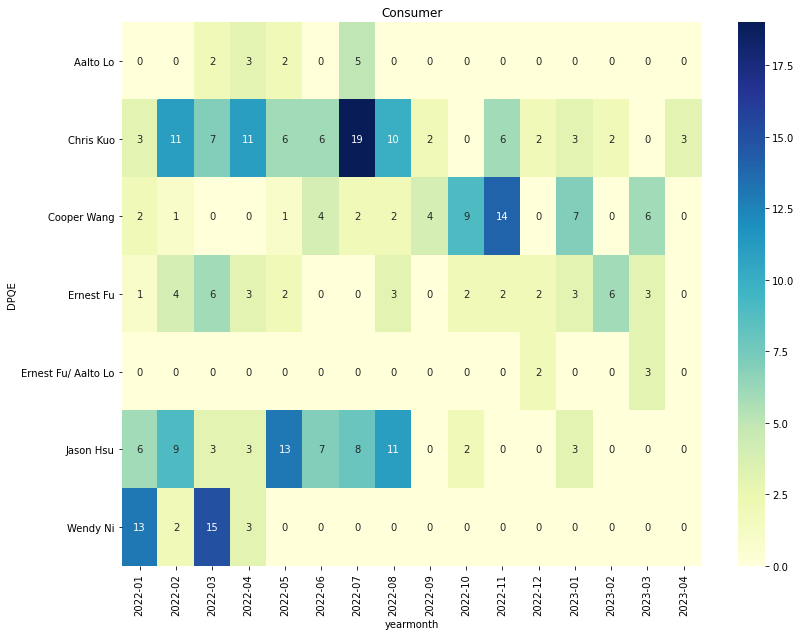

In [176]:
plt.figure(figsize=(13,10))
sns.heatmap(df_consumer.unstack(fill_value=0)['weighted'],cmap="YlGnBu", annot=True).set(title='Consumer')
plt.savefig('Counsumer Overview',bbox_inches = "tight")

In [177]:
df_aoem = df_aoem.groupby(['DPQE','yearmonth']).sum()

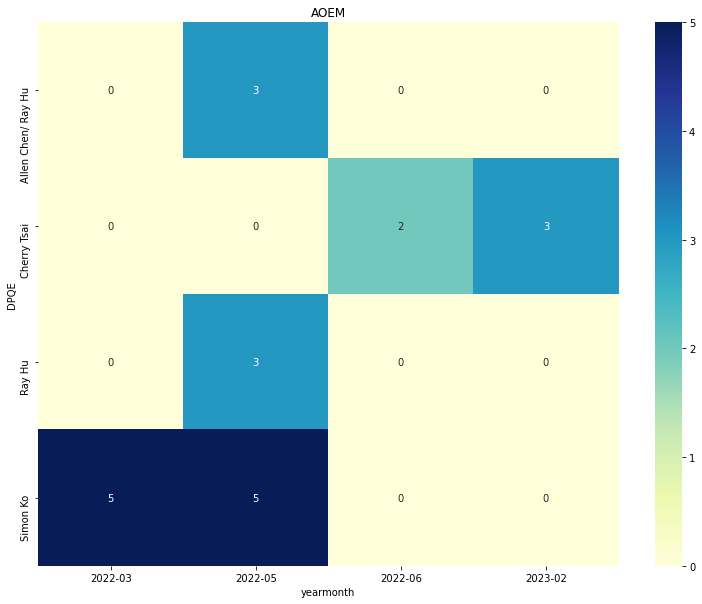

In [178]:
plt.figure(figsize=(13,10))
sns.heatmap(df_aoem.unstack(fill_value=0)['weighted'],cmap="YlGnBu", annot=True).set(title='AOEM')
plt.savefig('AOEM Overview',bbox_inches = "tight")

In [179]:
df2 = df.groupby(['DPQE','yearmonth','Project Name']).sum()

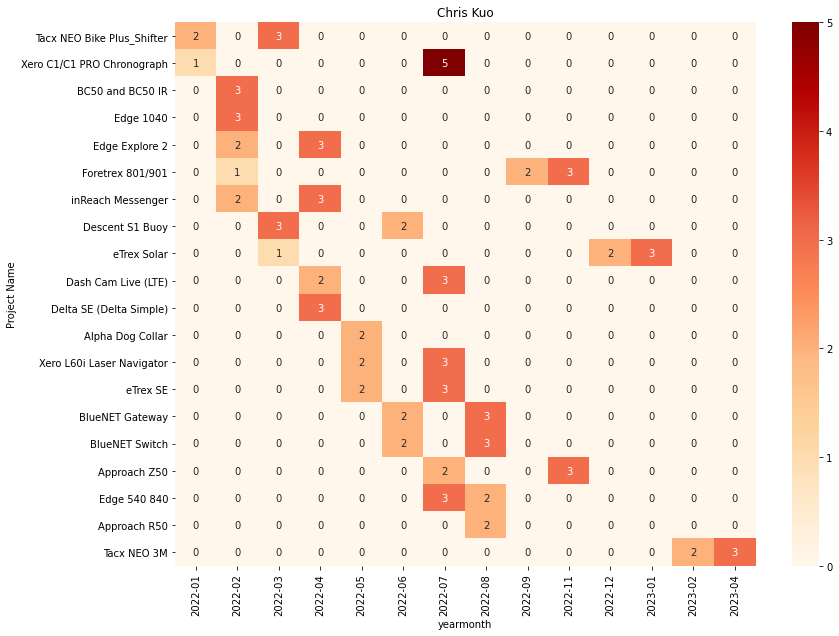

In [180]:
plt.figure(figsize=(13,10))
sns.heatmap(df2.loc['Chris Kuo']['weighted'].unstack(fill_value=0,level=0),cmap="OrRd", annot=True).set(title='Chris Kuo');

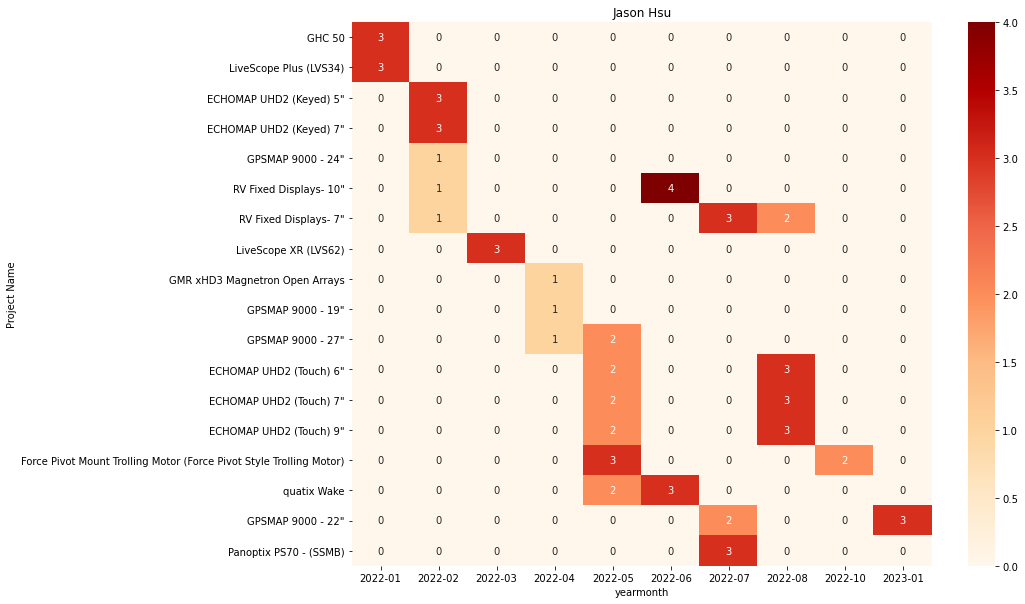

In [186]:
plt.figure(figsize=(13,10))
sns.heatmap(df2.loc['Jason Hsu']['weighted'].unstack(fill_value=0,level=0), annot=True,cmap="OrRd").set(title='Jason Hsu');
plt.savefig('Jason Hsu',bbox_inches = "tight")

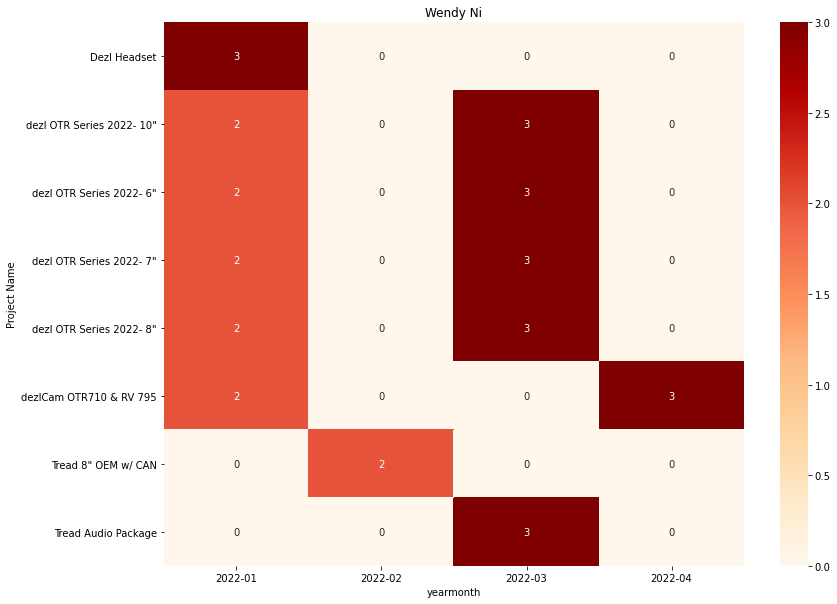

In [183]:
plt.figure(figsize=(13,10))
sns.heatmap(df2.loc['Wendy Ni']['weighted'].unstack(fill_value=0,level=0), annot=True,cmap="OrRd").set(title='Wendy Ni');

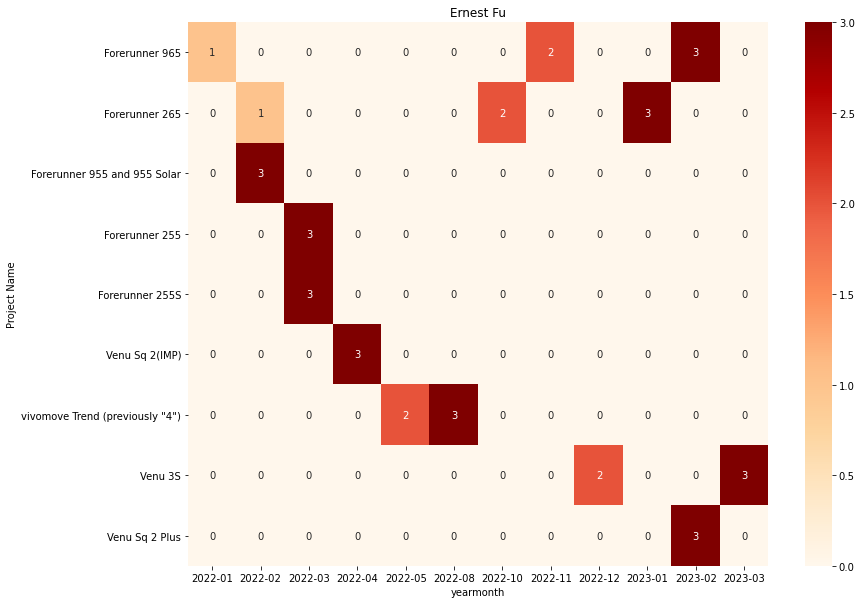

In [184]:
plt.figure(figsize=(13,10))
sns.heatmap(df2.loc['Ernest Fu']['weighted'].unstack(fill_value=0,level=0,),cmap="OrRd", annot=True).set(title='Ernest Fu');

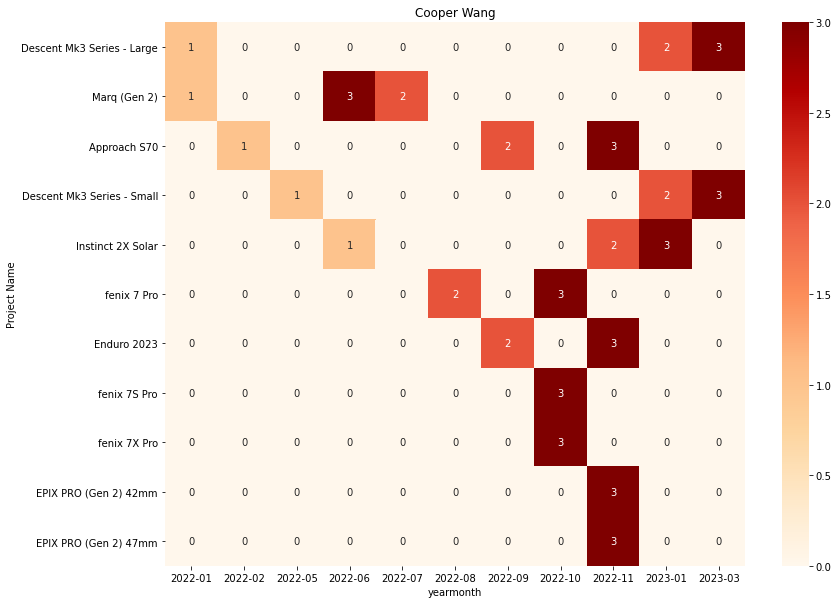

In [185]:
plt.figure(figsize=(13,10))
sns.heatmap(df2.loc['Cooper Wang']['weighted'].unstack(fill_value=0,level=0), annot=True,cmap="OrRd").set(title='Cooper Wang');

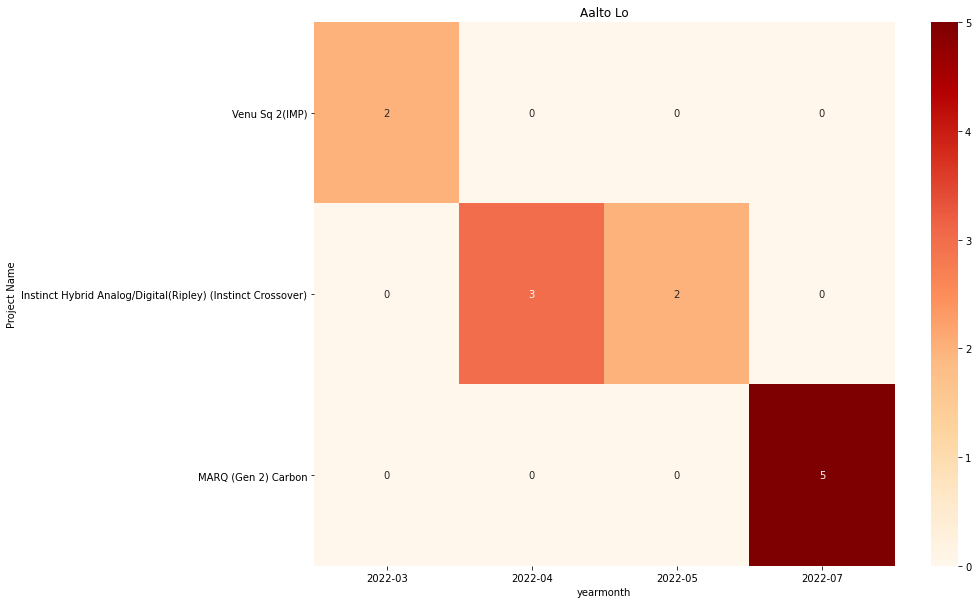

In [169]:
plt.figure(figsize=(13,10))
sns.heatmap(df2.loc['Aalto Lo']['weighted'].unstack(fill_value=0,level=0,),cmap="OrRd", annot=True).set(title='Aalto Lo');